# Anti Phishing Classifier

## All imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

sns.set()

# Metrics for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

## Read Dataset and X_train Y_train and X_train, X_test

In [2]:
# dataset_url = 'datasets/urlset.csv'
# data = pd.read_csv(dataset_url)
# data = shuffle(data).reset_index(drop=True)
# #data.shape
# labels = data.iloc[:, lambda df: [-1]]
# data = data.loc[:,lambda df:['domain', 'ranking']]
# #labels.shape
# #X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.33, random_state=42)
# #X_train.shape
# #X_test.shape

## Read Features set from Featureset

In [3]:
# featureset = 'featureset/cleaned_data.csv'
# data = pd.read_csv(featureset)
# data = shuffle(data).reset_index(drop=True)
# labels = data.iloc[:, lambda df: [-1]]
# data = data.iloc[:,:-2]
# data.shape
# sscaler = StandardScaler()
# #data = sscaler.fit_transform(data)
# print(data)

In [4]:
featureset_with_whois = 'featureset/cleaned_data_withwhois.csv'
data = pd.read_csv(featureset_with_whois)
sscaler = StandardScaler()
#data = sscaler.fit_transform(data)
labels = data.iloc[:, lambda df: [-1]]
data = data.iloc[:,1:-2]

train_data = data.iloc[0:4000,:]
labels_train = labels.iloc[0:4000,:]

test_data = data.iloc[4000:,:]
labels_test = labels.iloc[4000:,:]


# Create features is used to create features for the classification:
'''
1. Domain
2. URL_length
3. URL_slashes_count
4. URL_dots_count
5. URL_hostname_len

'''


In [5]:
def add_feature(data_frame):
#     url = data_frame['domain']
#     len_url = []
#     for u in url:
#         len_url.append(len(u))

#     data_frame['URL_length'] = pd.Series(len_url)
 
    count_slashes = []
    for u in url:
        count_slashes.append(u.count('//') )
    data_frame['URL_slashes_count'] = pd.Series(count_slashes)
    
#     count_dots = []
#     for u in url:
#         count_dots.append(u.count('.') )
#     data_frame['URL_dots_count'] = pd.Series(count_dots)

#     len_hostname = []
#     start = '://'
#     end = '/'

#     for u in url:
#         temp = u[u.find(start)+2*len(start) + 2: u.rfind(end)]
#         temp = temp.replace('/','.')
#         temp = temp.replace('-','.')
#         len_hostname.append(len(temp.split('.')))

#     data_frame['URL_hostname_len'] = pd.Series(len_hostname)
#     data_frame = data_frame.iloc[:,1:]
    return data_frame

    

## classify classifies the data in different using all the different  classifiers.

'''
1. Log-Regression
2. K-Nearest Neighbors - @params knn neighbors
3. Decision Tree - @params maximum depth
4. Random Forest - @params maximum depth, criterion, max_features, num_of_estimators
5. AdaBoost

'''

In [6]:
def get_best_clf_after_CrossVal(train_x, train_y, classifier_parameter_map):
    scoring_evals = {'AUC': 'roc_auc',
                     'Accuracy': make_scorer(accuracy_score),
                     'f1': make_scorer(f1_score)
                    }
    clf_list=[]
    for key in classifier_parameter_map:
        clf = GridSearchCV(classifier_parameter_map[key][0],
                     classifier_parameter_map[key][1],
                     #iid=False,
                     scoring = 'accuracy',
                     #refit = 'Accuracy',
                     cv=10, # no of validations
                     n_jobs = -1 # use full concurrency
                    )
        
        result = clf.fit(train_x, train_y)
        #print(clf.cv_results_)
        print(result.best_estimator_)
        print('score: ', result.best_score_)
        clf_list.append(result.best_estimator_)
    return clf_list

In [7]:
 def classify(train_x, train_y):
           
    logreg_parameters = {
     'penalty': ['l1','l2']
    }
    
    knn_parameters = {
       'n_neighbors': np.arange(2,100,1),
       'weights': ['distance'],
       'metric': ['minkowski']
    }
    dt_parameters = {
        'min_samples_split' : range(2,50,2),
        #'max_depth': range(1,50,2)
    }
    
    rf_parameters = {
    'bootstrap': [True],
    'max_depth': range(1,20,1),
    'n_estimators': range(2,100,1)
    }
    
    classifier_parameter_map = {"Log-Regression": (LogisticRegression(), logreg_parameters),
                          "K-Nearest Neighbors": (KNeighborsClassifier(), knn_parameters),
                          "Decision Tree": (DecisionTreeClassifier(), dt_parameters),
                          "Random Forest": (RandomForestClassifier(), rf_parameters)}
                                            #"AdaBoost"}
        
    clf_list = get_best_clf_after_CrossVal(train_x, train_y, classifier_parameter_map)
    print(len(clf_list))
    return clf_list
        
    

In [8]:
clf_list = classify(train_data, np.ravel(labels_train))

/Users/kumar4892/projects/fml/py3venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
score:  0.85125
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=96, p=2,
                     weights='distance')
score:  0.89175
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
score:  0.88775
RandomForestClassifier(bootstrap

## Save Models

In [9]:
classifiers = ['Log-Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']
for clfname, clf in zip(classifiers, clf_list):
    filename = str(clfname) + (str('.sav'))
    pickle.dump(clf, open(filename, 'wb'))

In [20]:
accuracies = []
for clfname, clf in zip(classifiers, clf_list):
    labels_pred = clf.predict(test_data)
    accuracies.append(accuracy_score(labels_test, labels_pred))
    print(clfname)
    print('Accuracy: ', accuracy_score(labels_test, labels_pred))
    print('Classification report')
    print(classification_report(labels_test, labels_pred, target_names=['Spam','Legitimate']))

Log-Regression
Accuracy:  0.872
Classification report
              precision    recall  f1-score   support

        Spam       0.86      0.89      0.87       496
  Legitimate       0.88      0.86      0.87       504

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000

K-Nearest Neighbors
Accuracy:  0.897
Classification report
              precision    recall  f1-score   support

        Spam       0.89      0.91      0.90       496
  Legitimate       0.91      0.89      0.90       504

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

Decision Tree
Accuracy:  0.883
Classification report
              precision    recall  f1-score   support

        Spam       0.87      0.89      0.88       496
  Legitimate       0.89      0.87      0.88       504

    accuracy    

[0.872, 0.897, 0.883, 0.918]


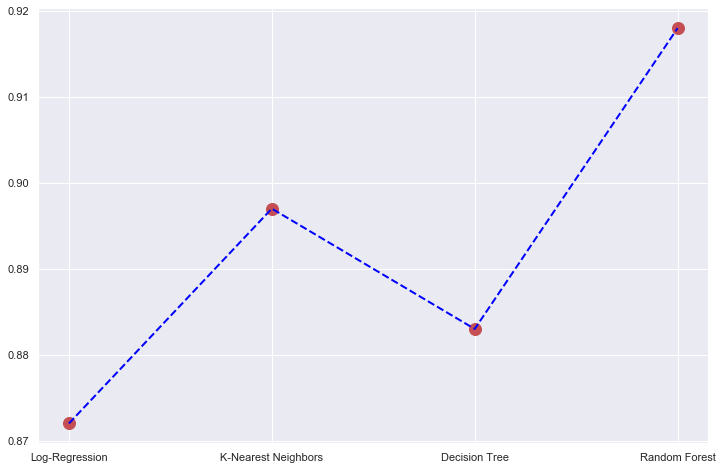

In [50]:

# names = ['', 'group_b', 'group_c']
# values = [1, 10, 100]
print(accuracies)

# plt.figure(figsize=(50, 9))
# plt.subplot(2,4,1)
# plt.hist(accuracies, bins = 20)
# plt.ylabel('Accuracies')
# plt.xlabel('Sample')
# #plt.legend(legend)
# #plt.title('Distribution of URL Length across phished\n and legitimate websites\n')
# plt.grid(True)

plt.figure(figsize=(12, 8))
plt.plot(classifiers, accuracies,'ro',markersize=12)
plt.plot(classifiers, accuracies,color = 'blue', linestyle = 'dashed',linewidth=2, markersize=12)
plt.show()
